In [34]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline

import sklearn

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import xgboost as xgb

from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.utils import shuffle
from scipy.stats import mode
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings

In [35]:
data = pd.read_csv('D:/FV_Raw/S01_05_rev.csv')
print(data.shape)

(33926, 94)


In [36]:
var = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
target = data['Class']

min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(var)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.569560,0.478011,0.3787,0.0,0.613485,0.783795,0.783795,0.369048,0.0,...,0.085822,0.033478,0.085538,0.058413,0.030419,0.710969,0.00000,0.000000,0.497083,17
1,0.276039,0.431766,0.325844,0.7500,0.0,0.489699,0.446879,0.446879,0.000000,0.0,...,0.100576,0.020811,0.075046,0.063253,0.032340,0.780613,0.00000,0.003934,1.000000,21
2,0.180883,0.306293,0.247769,0.7500,0.0,0.376979,0.391897,0.247210,0.000000,0.0,...,0.118208,0.156714,0.223768,0.065391,0.115917,0.247516,0.01976,0.023164,1.000000,9
3,0.227390,0.350265,0.270236,0.7901,0.0,0.416482,0.391897,0.326788,0.000000,0.0,...,0.091400,0.066051,0.151460,0.039167,0.049621,0.587263,0.00000,0.002404,1.000000,21
4,0.161380,0.293215,0.247769,0.6875,0.0,0.365231,0.326788,0.326788,0.000000,0.0,...,0.005578,0.014296,0.019389,0.035678,0.002729,0.969047,0.00000,0.000000,0.497083,9


In [37]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_data2 = pca.fit_transform(data2_norm)
data2_norm2 = pd.DataFrame(new_data2)
data_norm = data2_norm2.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Class
0,0.240235,-1.169858,0.663074,0.019229,0.620195,-0.742148,0.348154,-0.373015,-0.075575,-0.128976,-0.275285,0.310400,0.193656,-0.047904,-0.133225,0.149162,0.080341,17
1,-0.225106,-0.629123,-0.091924,-0.062670,-0.266067,0.186320,0.080216,-0.201968,0.101115,0.224332,0.061510,-0.096633,0.261985,-0.049817,-0.064037,-0.040096,0.147393,21
2,-0.190383,-0.517377,-0.379907,0.399697,-0.603177,-0.109152,0.063760,-0.082697,0.496658,-0.146083,0.055157,-0.007380,-0.086956,0.069441,0.175715,-0.045392,-0.197643,9
3,-0.363851,-0.501417,-0.156138,-0.177678,0.142810,-0.444388,-0.358293,0.082453,0.159960,-0.063044,0.104709,0.137652,-0.010886,0.114063,0.020326,-0.067436,-0.050562,21
4,-0.802729,-0.378539,-0.345526,-0.114439,0.687051,-0.119308,0.034842,0.214920,-0.087094,0.053155,-0.046394,-0.264762,0.115810,0.272997,-0.048212,0.042004,0.002226,9


In [38]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Class,ClassA
0,0.240235,-1.169858,0.663074,0.019229,0.620195,-0.742148,0.348154,-0.373015,-0.075575,-0.128976,-0.275285,0.310400,0.193656,-0.047904,-0.133225,0.149162,0.080341,17,17.0
1,-0.225106,-0.629123,-0.091924,-0.062670,-0.266067,0.186320,0.080216,-0.201968,0.101115,0.224332,0.061510,-0.096633,0.261985,-0.049817,-0.064037,-0.040096,0.147393,21,21.0
2,-0.190383,-0.517377,-0.379907,0.399697,-0.603177,-0.109152,0.063760,-0.082697,0.496658,-0.146083,0.055157,-0.007380,-0.086956,0.069441,0.175715,-0.045392,-0.197643,9,9.0
3,-0.363851,-0.501417,-0.156138,-0.177678,0.142810,-0.444388,-0.358293,0.082453,0.159960,-0.063044,0.104709,0.137652,-0.010886,0.114063,0.020326,-0.067436,-0.050562,21,21.0
4,-0.802729,-0.378539,-0.345526,-0.114439,0.687051,-0.119308,0.034842,0.214920,-0.087094,0.053155,-0.046394,-0.264762,0.115810,0.272997,-0.048212,0.042004,0.002226,9,9.0


In [39]:
def func2(data_norm1) :
    if data_norm1['Class'] == 9 : return 0
    else : return 1
data_norm1['ClassA'] = data_norm1.apply(func2, axis = 1)

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


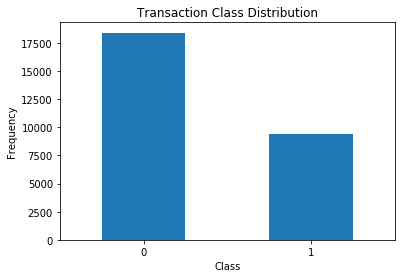

In [40]:
count_classes = pd.value_counts(data_norm1['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [41]:
X= data_norm1.drop(['Class','ClassA'], axis=1)
y= data_norm1['ClassA']

train, test = train_test_split(data_norm1, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


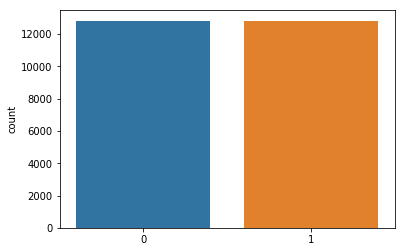

In [42]:
smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

In [43]:
x_test=x_test.values
y_test=y_test.values

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
from mlxtend.regressor import StackingRegressor

# 예측모형 아키텍처
## 첫번째 계층 회귀모형
estimators = [('SVC', svm.SVC(gamma = 'scale', probability=True)),
              ('RF', RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)),
              ('svr', xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5))]

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
reg = StackingRegressor(estimators=estimators, final_estimator=None)

y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

reg.transform(x_test[:5])

reg.fit(x_train, y_train)

AttributeError: 'StackingRegressor' object has no attribute 'final_estimator_'

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('SVC', svm.SVC(gamma = 'scale', probability=True)),
              ('RF', RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)),
              ('GBM', GradientBoostingClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0))


clf.fit(x_train_sm, y_train_sm).score(x_test, y_test)

0.8443752246316042

In [23]:

# 성능
stack_pred = reg_stack.predict(x_test)

# 예측모형 성능 비교
reg_stack_rmse = np.sqrt(mean_squared_error(y_test, stack_pred))
print(f'구글 앱 평점 예측 RMSE(Ensemble - Averaging): {reg_stack_rmse:.3f}')

ValueError: feature_names mismatch: ['0 ', '1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10', '11', '12', '13', '14', '15', '16'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']
expected 3 , 16, 4 , 5 , 10, 13, 15, 14, 11, 7 , 12, 9 , 2 , 1 , 0 , 6 , 8  in input data
training data did not have the following fields: f4, f0, f8, f14, f12, f16, f1, f7, f15, f10, f13, f6, f11, f5, f3, f2, f9

In [17]:
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [19]:
### Random Forest classifier
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [3, 8, 8],
              "min_samples_split": [2, 3, 8],
              "min_samples_leaf": [1, 3, 8],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, rf_param_grid, cv=k_fold, scoring="accuracy",  verbose = 1)
#print(score)

gsRFC.fit(x_train_sm,y_train_sm)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
### GBM classifier
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train_sm,y_train_sm)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_train_sm,y_train_sm)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
### XGboost classifier
XGBC = XGBClassifier()
xgb_param_grid = {'max_depth':[3,5,7],
                  'min_child_weight':[3,5,6],
                  'gamma': [ 0, 0.001, 0.01, 0.1, 1],
                  'learning_rate':[0.1, 0.05, 0.01]}

gsXGBC = GridSearchCV(XGBC,param_grid = xgb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC.fit(x_train_sm,y_train_sm)

XGBC_best = gsXGBC.best_estimator_

# Best score
gsXGBC.best_score_

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), 
('svc', SVMC_best),('gbc',GBC_best), ('xgb', XGBC_best)], voting='hard', n_jobs=4)

votingC = votingC.fit(x_train_sm,y_train_sm)

prediction = votingC.predict(x_test)

In [ ]:
from mlxtend.regressor import StackingRegressor

# 예측모형 아키텍처
## 첫번째 계층 회귀모형
XGBC = XGBClassifier()
SVMC = SVC(probability=True)
RFC = RandomForestClassifier()

## 두번째 계층 회귀모형
reg_meta = RandomForestClassifier()

# 스태킹 예측모형
reg_stack = StackingRegressor(
    regressors=[XGBC, SVMC, RFC],
    meta_regressor=reg_meta,
    use_features_in_secondary=True)
reg_stack.fit(x_train, y_train)

# 성능
stack_pred = reg_stack.predict(x_test)

# 예측모형 성능 비교
reg_stack_rmse = np.sqrt(mean_squared_error(y_test, stack_pred))
print(f'구글 앱 평점 예측 RMSE(Ensemble - Averaging): {reg_stack_rmse:.3f}')